In [1]:
Names: ['Lucas Belderink', 'Rama Pamudji'] 
Studentnumbers: ['12151750', '11170220']

# Applied Machine learning
## Practical Assignment 2

### Important Notes:
1. Submit through **Canvas** before 11:59pm on Tuesday, May 11, 2021
2. No late homework will be accepted
3. This is a group-of-two assignment
4. The submitted file should be in ipynb format
5. The assignment is worth it 10 points
6. For questions, please use the discussion part of Canvas (English only!)
7. The indication **optional** means that the question is optional; you won't lose any points if you do not do that part of the assignment, nor will you gain if you do it.

### Software:
We will be using Python programming language throughout this course. Further we will be using:
+ IPython Notebooks (as an environment)
+ Numpy
+ Pandas
+ Scikit-learn

### Background:

This practical assignment will be covering logistic regression, neural networks, support vector machines and evaluation of classifiers. 

For the assignment, please download a dataset on Load Defaults. You are provided with two datasets:
1. [Dataset](https://drive.google.com/open?id=1cj-CzkY6QZUe42ky64GI5CSSg7-K40N5) with 10,000 instances 
2. [Dataset](https://drive.google.com/open?id=1MbWGXLawE3VTxP1XgNpj8uEo1VHPq12B) with 100,000 instances
In principle you should work on the second, larger dataset, but if you face scaling computational issues then better work with the first, smaller dataset.

This data corresponds to a set of financial transactions associated with individuals. The data has been standardized, de-trended, and anonymized. You are provided with thousands of observations and nearly 800 features. Each observation (instance) is independent from the previous. 

For each observation, it was recorded whether a default was triggered. In case of a default, the loss was measured. This quantity lies between 0 and 100. It has been normalised, considering that the notional of each transaction at inception is 100. For example, a loss of 60 means that only 40 is reimbursed. If the loan did not default, the loss was 0. You are asked to predict the losses for each observation in the test set.

Missing feature values have been kept as is, so that the competing teams can really use the maximum data available, implementing a strategy to fill the gaps if desired. Consider all variables continuous, even though some variables may be categorical (e.g. f776 and f777).

The goal of the machine learning algorithm will be to predict whether a loan will default, given a set of features. For privacy reasons the feature names are not provided.

**Important Note**: This second assignment is not as instructive as the first assignment. The first assignment guided you step-by-step through all the preprocessing, training-validation-testing setup, etc. This assignment does not do so, but it leaves it up to you to decide how to use the data and design your experiments.

In [2]:
# Download the data
# Dataset with 10K instances
! gdown "https://drive.google.com/uc?id=1cj-CzkY6QZUe42ky64GI5CSSg7-K40N5"
# Dataset with 100k instances
! gdown "https://drive.google.com/uc?id=1MbWGXLawE3VTxP1XgNpj8uEo1VHPq12B"

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!pip install tabulate

### Part 1: Import the data

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('loan_default_10K.csv', sep=",", header=0, dtype=np.float64)

# Drop the observations that contain missing values
dfn = df.dropna(0, how='any')

# Consider only a handful of features to start with; you can extend to the full set later on.
X = dfn.loc[:,'f400':'f500'].values

# Generate the labels; if 'loss' is zero the this indicates the negative class, class 0, i.e. no default;
# if 'loss' is possitive this indicates the positive class, class 1, i.e. there is a loan default;
y = [ bool(y) for y in dfn.loc[:,'loss'].values ]

# Separate the data into train, validation, and test.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20)

In [5]:
import random
from tabulate import tabulate
from sklearn import svm
import sklearn


predicted_y = [random.choice([True, False]) for x in range(len(y))]

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalization
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Part 2: Evaluation measures (2pts)
In what follows you should implement a number of evaluation measures. You need to implement these from scratch, meaning that it is not allowed to call any scikit-learn function, or any other API function that implements the method for you.

* Implement a function that produces the contigency matrix, i.e. True Positives, False Positives, True Negatives, False Negative

In [7]:


def contingency_matrix(true_y, predicted_y):
    count_tp = 0
    count_tn = 0
    count_fp = 0
    count_fn = 0

    for x in range(len(true_y)):
        if true_y[x] == True and true_y[x] == predicted_y[x]:
            count_tp+=1
        if true_y[x] == False and true_y[x] == predicted_y[x]:
            count_tn+=1
        if true_y[x] == True and true_y[x] != predicted_y[x]:
            count_fn+=1
        if true_y[x] == False and true_y[x] != predicted_y[x]:
            count_fp+=1
#     print("TPs, fps ", [count_tp, count_fp])
#     print("TNs, fns ", [count_tn, count_fn])
#     print(np.array(([count_tp, count_fp], [count_tn, count_fn])))
    
    matrix = np.array(([count_tp, count_fp], [count_tn, count_fn]))

    # Make sure your output fits the following format:
    # matrix = np.array(([TP, FP], [TN, FN]))
    return matrix
    
print(contingency_matrix(y, predicted_y)[0][0])
print(contingency_matrix(y, predicted_y)[0][1])
print(contingency_matrix(y, predicted_y)[1][0])
print(contingency_matrix(y, predicted_y)[1][1])

216
1998
1954
199


* Implement a function that computes accuracy (without using any built-in accuracy function)

In [8]:
def accuracy(true_y, predicted_y):
    contingency = contingency_matrix(true_y, predicted_y)
    
    return (contingency[0][0] + contingency[1][0]) / len(predicted_y)

    
print(accuracy(y, predicted_y))
sklearn.metrics.accuracy_score(y, predicted_y)

0.49690863292878407


0.49690863292878407

* Implement a function that computes precision  (without using any built-in precision function)

In [9]:
def precision(true_y, predicted_y):
    contingency = contingency_matrix(true_y, predicted_y)
    
    
    if (contingency[0][0] + contingency[0][1]) == 0:
        return 0
    else:
        return (contingency[0][0] / (contingency[0][0] + contingency[0][1]))
    
    
print(precision(y, predicted_y))
sklearn.metrics.precision_score(y, predicted_y)


0.0975609756097561


0.0975609756097561

* Implement a function that computes recall (without using any built-in recall function)

In [10]:
def recall(true_y, predicted_y):
    contingency = contingency_matrix(true_y, predicted_y)

    if (contingency[0][0] + contingency[1][1]) == 0:
        return 0
    else:
        return (contingency[0][0] / (contingency[0][0] + contingency[1][1]))

print(recall(y, predicted_y))
sklearn.metrics.recall_score(y, predicted_y)


0.5204819277108433


0.5204819277108433

* Implement a function that computes f1 (without using any built-in f1 function)

In [11]:
def f1(true_y, predicted_y):
    prec = precision(true_y, predicted_y)
    rec = recall(true_y, predicted_y)
    
    if (prec + rec) == 0:
        return 0
    else:
        return (2 * ((prec*rec)/(prec+rec)))

print(f1(y, predicted_y))

0.16432103461392164


### Part 3: Algorithms
Compare the performance of Logistic Regression, Neural Networks, and SVMs

##### Logistic Regression (Lecture 3) (2pts)

+ Train and test a logistic regression model
    + Construct a table with each row being a different value of the regularization parameter and each column the aforementioned measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [12]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

regparams = [1, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]

for const in regparams:
    print("Using C = ", const, " : ")
    log = LogisticRegression(random_state = 0, C = const, max_iter = 1000, solver = 'liblinear')
    log.fit(X_train_scaled, y_train)
    predictions = log.predict(X_train_scaled)

    conf = confusion_matrix(y_train, predictions)
    print("True negatives: ", conf[0][0])
    print("False negatives: ", conf[1][0])
    print("True positives: ", conf[1][1])
    print("False positives: ", conf[0][1])
    print("")


Using C =  1  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.8  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.7  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.6  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.5  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.4  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.3  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.2  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.1  : 
True negatives:  3160
False negatives:  332
True positives:  1
False positives:  0

Using C =  0.05  : 
True negatives:  3160
False negatives:  333
True positi

* Explain what you observe regarding the positive class; i.e. the performance of the algorithm in predicting defaults. Explain why is this happening.

<span style="color:blue">The algorithm almost exclusively predicts negative classes. The negative class is far more frequent in the dataset (415 positive class cases, and 3952 negative class cases) which causes the logistic model to favour predicting a negative class far more frequently. </span>

There are a number of ways to fix the problem you have observed above. Here we will consider two of them: downsampling and upsampling. In an ideal situation you will like your dataset to be balanced, i.e. to have the same number of instances for the positive and the negative class.

**Downsampling**: Let's assume that the positive class has *n1* instances, while the negative class *n2* instances, where *n2* is much bigger than *n1*. One solution is to create a new training set for which from the *n2* instances of the negative class you sample *n1* of them only to include in your training set; hence now you have *n1* + *n1* training instances.

**Upsampling**: Let's assume that the positive class has *n1* instances, while the negative class *n2* instances, where *n2* is much bigger than *n1*. Another solution is to create a new training set for which you create  *n2* instances of the positive class. To do so you sample *n2* instances from the *n1* instance, with replacement. With replacement means that you allow the same instance to be sampled multiple times; hence now you have *n2* + *n2* training instances.

#### Downsampling (OPTIONAL – If you wish to skip downsampling continue to Neural Networks further below)


* Implement a function for downsampling (**optional**)

In [13]:
import random

def downsample(y_train):
    # y_train is the 1d matrix of the labels in your training data, e.g.
    #       0     1     2     3     4   5     6     7     8   ... 
    # y = [True False False False True True False False False ... False]
    #
    # the function returns the position of the training data to be considered for the final training set.
    # e.g. if you decide from the True instances to select 0, 4 and 5, while from the False instances 1, 3, and 8
    # the outcome of the function will be [0, 1, 3, 4, 5, 8] (= sampled_indexes)
    
    positive_indexes = []
    negative_indexes = []
    
    for i in range(0, len(y_train)):
        if y_train[i] == True:
            positive_indexes.append(i)
        elif y_train[i] == False:
            negative_indexes.append(i)
         
    if len(positive_indexes) > len(negative_indexes):
        positive_indexes = random.sample(positive_indexes, len(negative_indexes))
    elif len(negative_indexes) > len(positive_indexes):
        negative_indexes = random.sample(negative_indexes, len(positive_indexes))
        
    sampled_indexes = sorted(positive_indexes + negative_indexes)

    return sampled_indexes

sampled_indexes = downsample(y_train)

    
def new_training_set(X_train, y_train, sampled_indexes):
    new_X = []
    new_y = []
    
    for index in sampled_indexes:
        new_X.append(list(X_train[index]))
        new_y.append(y_train[index])
        
    return new_X, new_y

downsampled_X_train, downsampled_y_train = new_training_set(X_train_scaled, y_train, sampled_indexes)


print(len(X_train_scaled))
print(len(downsampled_X_train))
print(len(y_train))
print(len(downsampled_y_train))

# Count the amount of positive and negative classes in the downsampled y_train dataset to show the downsampling
# executed successfully.
pos = 0
neg = 0
for item in downsampled_y_train:
    if item == True:
        pos += 1
    elif item == False:
        neg += 1
        
print(pos, neg)


3493
666
3493
666
333 333


* Test the performance of logistic regression using the new training set, and report your conclusions (**optional**)

In [14]:
# regparams = [1, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01]
# regparams = [100000, 10000, 1000, 100, 10, 5, 1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]
regparams = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 5, 10, 100, 1000, 10000]

results = []

for const in regparams:
    log = LogisticRegression(random_state = 0, C = const, solver = 'liblinear')
    log.fit(downsampled_X_train, downsampled_y_train)
    predictions = log.predict(X_test_scaled)

    acc = round(accuracy(downsampled_y_train, predictions), 4)
    rec = round(recall(downsampled_y_train, predictions), 4)
    prec = round(precision(downsampled_y_train, predictions), 4)
    f1s = round(f1(downsampled_y_train, predictions), 4)
#     print(acc, rec, prec, f1s)

    tablerow = (const, acc, rec, prec, f1s)
    results.append(tablerow)
        
print(tabulate(results, headers=["regularization C", "Accuracy", "Recall", "Precision", "F1 score"]))
    

  regularization C    Accuracy    Recall    Precision    F1 score
------------------  ----------  --------  -----------  ----------
            1e-05       0.3719    0.4024       0.4855      0.4401
            0.0001      0.365     0.4234       0.4764      0.4483
            0.001       0.381     0.4745       0.5         0.4869
            0.01        0.3856    0.4775       0.5064      0.4915
            0.05        0.3822    0.4535       0.5017      0.4763
            0.1         0.3822    0.4565       0.5017      0.478
            0.2         0.3787    0.4505       0.4967      0.4724
            0.3         0.3833    0.4535       0.5033      0.4771
            0.5         0.3856    0.4595       0.5066      0.4819
            0.8         0.3856    0.4625       0.5066      0.4835
            1           0.3856    0.4565       0.5067      0.4803
            5           0.3799    0.4414       0.4983      0.4682
           10           0.3867    0.4655       0.5082      0.4859
          1

<span style="color:blue">The downsampled results show the model still scores rather poorly for predictions, 
but significantly better than the model with a non-downsampled training set.
We would like to add that the results still prioritized just a single classification, until we added scaling to
the X set.
The optimal configuration seems to be with regularization C = 0.001
</span>

# The last few questions below are not optional!
If you did not finish the optional downsampling, just go through with the data created before

##### Neural Network (2pts)

+ Train and test a Neural Network model
    + Construct a table with each row being a different configuration of the network (play with the number of hidden layers, the number of neurons in each layer, and the activation function) and each column the evaluation measures
    + Report the performance of at least three different configurations
    + Explain your findings and select the optimal model
    + Justify your choice of different paramteres and architectures
    + Report the performance of the optimal model

In [15]:
from sklearn.neural_network import MLPClassifier  
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score

In [16]:
# self imagined layers with different neuron combinations
layers = [(4,3,2,1), (10,5,2,1), (50,25,10,1), (5,8,3,4), (1,10,100,1), (10,100,1000,1), (1000,10,100,4), (1000,100,10,2), (5,2,1), (20,10,1), (50,25,1), (5,1), (10,5), (100,10)]
act = ['logistic', 'relu', 'tanh']

table = []

for x in range(len(layers)):
    for y in range(len(act)):
        mlp = MLPClassifier(hidden_layer_sizes=layers[x], activation=act[y])
        mlp.fit(downsampled_X_train, downsampled_y_train)
    
        table.append(["l:"+str(len(layers[x]))+", "+"n:"+str(layers[x])+", "+act[y], accuracy_score(y_test, mlp.predict(X_test_scaled), normalize=True), 
          precision_score(y_test, mlp.predict(X_test_scaled)),
         recall_score(y_test, mlp.predict(X_test_scaled)),
                     f1_score(y_test, mlp.predict(X_test_scaled))])

print(tabulate(table, headers=["Configuration","Accuracy",'precision','recall','f1'], tablefmt="fancy_grid"))


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

╒═════════════════════════════════════╤════════════╤═════════════╤══════════╤══════════╕
│ Configuration                       │   Accuracy │   precision │   recall │       f1 │
╞═════════════════════════════════════╪════════════╪═════════════╪══════════╪══════════╡
│ l:4, n:(4, 3, 2, 1), logistic       │  0.906178  │   0         │ 0        │ 0        │
├─────────────────────────────────────┼────────────┼─────────────┼──────────┼──────────┤
│ l:4, n:(4, 3, 2, 1), relu           │  0.566362  │   0.122137  │ 0.585366 │ 0.202105 │
├─────────────────────────────────────┼────────────┼─────────────┼──────────┼──────────┤
│ l:4, n:(4, 3, 2, 1), tanh           │  0.62357   │   0.095082  │ 0.353659 │ 0.149871 │
├─────────────────────────────────────┼────────────┼─────────────┼──────────┼──────────┤
│ l:4, n:(10, 5, 2, 1), logistic      │  0.0938215 │   0.0938215 │ 1        │ 0.171548 │
├─────────────────────────────────────┼────────────┼─────────────┼──────────┼──────────┤
│ l:4, n:(10, 5, 2, 1

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<span style="color:blue"><span style="color:blue">We will take a look at the following neural networks: (4 Layers, Neurons: 1000,10,100,4, activation = relu), ( 4 layers, neurons: 1,10,100,1, activation = tanh) and (2 layers, neurons = 5,1, activation = logistic)\
    \
**(4 Layers, Neurons: 1000,10,100,4, activation = relu)**\
This configuration was chosen because it was one of the few cases with an output of 4, the ReLU activation function and the varying neurons per layer. It was also chosen as the f1 score was relatively high compared to other configurations with ReLU activation functions with a score of 0.171582. The precision and recall scores were respectfully 0.106667 and 0.438356. These are relatively decent scores and they show that the amount of layers and neurons per layer were relatively effective but less accurate then some with an accuracy of 0.646453.\
    \
**( 4 layers, neurons: 1,10,100,1, activation = tanh)**\
This configuration was chosen because of the ascending neurons per layer, the output of 1 and the Tanh activation function.
This configuration shows a relatively high f1 score compared to all other configuration with a f1 score of 0.19577. This also showed a very high recall score of 0.863014 but a lower precision score of 0.094546. The accuracy does show that it was less effective as it has an accuracy score of 0.298627.\
    \
**(2 layers, neurons = 5,1, activation = logistic)**\
This configuration was chosen because of it's 2 layers and logistic activation function. This also the most optimal configuration as it has a recall score of 0.726027, a precision score of 0.115217 and an accuracy score of 0.511442. Overall the precision and recall scores were both higher than all other configurations and it has a relatively high accuracy score making it the most optimal configuration.\
\
The configuration **(2 layers, neurons = 5,1, activation = logistic)** was the most optimal as shown by the precision-, recall- and accuracy score of respectfully 0.115217, 0.726027 and 0.511442. This is due to the fact that there is no hidden layer and a small amount of neurons which prevent overfitting but could also potentially lead to underfitting. So in all fairness the configuration **(4 layers, neurons = 1000,10,100,4 activation = tanh)** with a slightly less better accuracy, precision and recall score of respectfully 0.529748, 0.112385 and 0.671233. This score shows a good performance and shows that it is a quite effective configuration for a configuration with 2 hidden layers and a large set of neurons. 
</span>

##### SVMs (2pts)

+ Train and test a Support Vector Machine model
    + Construct a table with each row being a different configuration of the SVM algorithm (play with the regularization parameter, and the kernel function – use linear, poly, and rbf) and each column the evaluation measures
    + Explain your findings and select the optimal model
    + Report the performance of the optimal model

In [17]:
# print("Scores using C = ", const, " :")
# print("_____________________________________________________")
# print("accuracy: ", accuracy(downsampled_y_train, svm_predictions))
# print("recall: ", recall(downsampled_y_train, svm_predictions))
# print("precision: ", precision(downsampled_y_train, svm_predictions))
# print("f1: ", f1(downsampled_y_train, svm_predictions))
# print("")

svm_model = svm.SVC(C = 1, kernel = "linear")
svm_model.fit(downsampled_X_train, downsampled_y_train)

svm_predictions = svm_model.predict(downsampled_X_train)

contingency = contingency_matrix(downsampled_y_train, svm_predictions)
# print(svm_predictions)
print(contingency)

[[218 132]
 [201 115]]


In [18]:

# regparams = [1, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4]
# regparams = [10000, 1000, 100, 10, 5, 1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05, 0.01, 0.001, 0.0001, 0.00001]
regparams = [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1, 5, 10, 100]

kernels = ["linear", "poly", "rbf"]

resultsSVM = []

for kern in kernels:
    for const in regparams:    
        svm_model = svm.SVC(C = const, kernel = kern)
        svm_model.fit(downsampled_X_train, downsampled_y_train)

        svm_predictions = svm_model.predict(X_test_scaled)


        acc = round(accuracy(y_test, svm_predictions), 4)
        rec = round(recall(y_test, svm_predictions), 4)
        prec = round(precision(y_test, svm_predictions), 4)
        f1s = round(f1(y_test, svm_predictions), 4)

        tablerow = (kern, const, acc, rec, prec, f1s)
        resultsSVM.append(tablerow)
        
print(tabulate(resultsSVM, headers=["Kernel", "regularization C", "Accuracy", "Recall", "Precision", "F1 score"]))
    
    
    

Kernel      regularization C    Accuracy    Recall    Precision    F1 score
--------  ------------------  ----------  --------  -----------  ----------
linear                1e-05       0.7723    0.1463       0.0851      0.1076
linear                0.0001      0.7723    0.1463       0.0851      0.1076
linear                0.001       0.5641    0.561        0.1176      0.1945
linear                0.01        0.54      0.5976       0.1172      0.196
linear                0.05        0.5366    0.4756       0.0973      0.1615
linear                0.1         0.5309    0.4756       0.0961      0.1598
linear                0.2         0.5286    0.4634       0.0936      0.1557
linear                0.3         0.5286    0.5          0.0995      0.166
linear                0.5         0.5309    0.5          0.1         0.1667
linear                0.8         0.5195    0.5          0.0976      0.1633
linear                1           0.5286    0.5          0.0995      0.166
linear         

<span style="color:blue">Overall the model scores rather poorly. The highest accuracy score is reached by the poly kernel with C ~= 0.05. But this is accompanied with the other scores being very low for this case.
The scores of the poly kernel seem to deviate the most overall with the different regularization scores.
Precision scores are generally low across the board.
The linear kernel scores pretty well at low regularization (high C) but is outclassed by the rbf kernel.
The highest scoring combination of parameters seems to be the rdf kernel with C = 0.1.
</span>


#### Compare Algorithms (2pts)
* Plot the Precision-Recall curves for the best model for each one of the above algorithms, Logistic Regression, Neural Nets, and SVM.
    * Use the precision_recall_curve from scikit-learn
* Explain your findings

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.11')

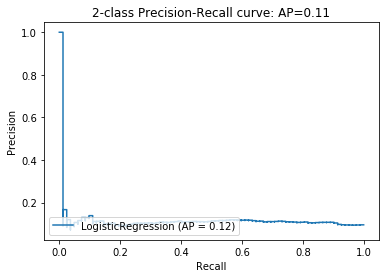

In [20]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

log = LogisticRegression(random_state = 0, C = 0.001, solver = 'liblinear')
log.fit(downsampled_X_train, downsampled_y_train)
log_predictions = log.predict(X_test_scaled)


average_precision = average_precision_score(y_test, log_predictions)

disp = plot_precision_recall_curve(log, X_test_scaled, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.10')

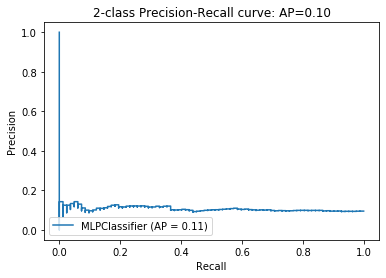

In [21]:
mlp = MLPClassifier(hidden_layer_sizes = layers[6], activation = act[2])
mlp.fit(downsampled_X_train, downsampled_y_train)

mlp_predictions = mlp.predict(X_test_scaled)

average_precisionmlp = average_precision_score(y_test, mlp_predictions)

disp = plot_precision_recall_curve(mlp, X_test_scaled, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precisionmlp))

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.10')

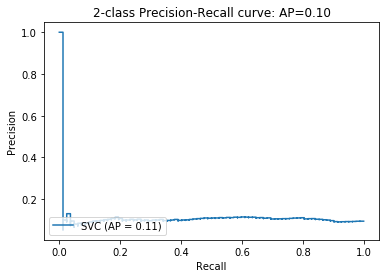

In [22]:
svm_model = svm.SVC(C = 0.1, kernel = 'rbf')
svm_model.fit(downsampled_X_train, downsampled_y_train)

svm_predictions = svm_model.predict(X_test_scaled)

average_precisionsvm = average_precision_score(y_test, svm_predictions)

disp = plot_precision_recall_curve(svm_model, X_test_scaled, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precisionsvm))

<span style="color:blue">
Out of the three models, the SVC seems to score the worst, but not by a large margin.
The highest scoring model is the neural network, with logistic regression coming in a close second.

</span>